# Setup

In [1]:
import ROOT
# %jsroot off
# Enable multi-threading with the specified amount of threads (let's start with just one)
# Note that in newer ROOT versions you simply need to write ROOT.EnableImplicitMT()
# ROOT.EnableImplicitMT()

from rich import print


/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.14/site-packages/ROOT/__init__.py:5: UserWarning: 
This distribution of ROOT is in alpha stage. Feedback is welcome and appreciated. Feel free to reach out to the user forum for questions and general feedback at https://root-forum.cern.ch or to submit an issue at https://github.com/root-project/root/issues. Do not rely on this distribution for production purposes.

  warnings.warn(
/home/thea/devel/dune-trigger/root-test/.venv/lib/python3.14/site-packages/cppyy/__init__.py:374: UserWarning: CPyCppyy API not found (tried: /home/thea/.local/share/uv/python/cpython-3.14.0-linux-x86_64-gnu/include/site/python3.14); set CPPYY_API_PATH envar to the 'CPyCppyy' API directory to fix
  warnings.warn("CPyCppyy API not found (tried: %s); "


In [2]:
eospath='root://eosproject.cern.ch//eos/project/d/dunedaq-eos/trigger-studies/vd_bkg/anatree/trigtree_tpg_vd_radiols.root '
df = ROOT.RDataFrame('triggerAna/TriggerPrimitives/tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker', eospath)
print(df.GetColumnNames())


{ "TPCSetID", "adc_integral", "adc_peak", "bt_edep", "bt_generator_name", "bt_numelectrons", 
"bt_primary_track_energy_frac", "bt_primary_track_id", "bt_primary_track_numelectron_frac", "bt_primary_x", 
"bt_primary_y", "bt_primary_z", "bt_truth_block_id", "bt_x", "bt_y", "bt_z", "channel", "detid", "event", "flag", 
"readout_plane_id", "readout_view", "run", "samples_over_threshold", "samples_to_peak", "subrun", "time_start", 
"version" }

In [24]:
eospath='root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_100_ana.ntuple.root'

rdf = ROOT.RDataFrame('triggerAna/TriggerPrimitives/tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker', eospath)
print(rdf.GetColumnNames())

{ "TPCSetID", "adc_integral", "adc_peak", "bt_edep", "bt_generator_name", "bt_numelectrons", 
"bt_primary_track_energy_frac", "bt_primary_track_id", "bt_primary_track_numelectron_frac", "bt_primary_x", 
"bt_primary_y", "bt_primary_z", "bt_truth_block_id", "bt_x", "bt_y", "bt_z", "channel", "detid", "event", "flag", 
"readout_plane_id", "readout_view", "run", "samples_over_threshold", "samples_to_peak", "subrun", "time_start", 
"version" }

In [34]:
rso = ROOT.RDF.RSnapshotOptions()
rdf.Redefine('subrun', '100').Snapshot('triggerAna/TriggerPrimitives/tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker', 'aaa.root', options=rso)

<cppyy.gbl.ROOT.RDF.RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x207a6fc0>

In [39]:
rdf_b = ROOT.RDataFrame('triggerAna/TriggerPrimitives/tpmakerTPCSimpleThreshold__TriggerPrimitiveMaker', 'aaa.root')


In [40]:
rdf_b.Display()

Row,TPCSetID,adc_integral,adc_peak,bt_edep,bt_generator_name,bt_numelectrons,bt_primary_track_energy_frac,bt_primary_track_id,bt_primary_track_numelectron_frac,bt_primary_x,bt_primary_y,bt_primary_z,bt_truth_block_id,bt_x,bt_y,bt_z,channel,detid,event,flag,readout_plane_id,readout_view,run,samples_over_threshold,samples_to_peak,subrun,time_start,version
0,0,46,46,0.000000,"""""",0.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,146,3,1,0,0,0,20000011,1,0,100,5888,2
1,2,46,46,0.000000,"""""",0.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,1878,3,1,0,0,0,20000011,1,0,100,260864,2
2,2,46,46,0.000000,"""""",0.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,2187,3,1,0,1,1,20000011,1,0,100,266368,2
3,2,49,49,0.000000,"""""",0.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,2213,3,1,0,1,1,20000011,1,0,100,75872,2
4,2,52,52,0.000000,"""""",0.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999,-99999.000000,-99999.000000,-99999.000000,2364,3,1,0,2,2,20000011,1,0,100,233216,2
,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [3]:
df.Display().Print()
df.Count().GetValue()

1552294

+-----+----------+--------------+----------+----------+-------------------+-----------------+-----+
| Row | TPCSetID | adc_integral | adc_peak | bt_edep  | bt_generator_name | bt_numelectrons | ... | 
+-----+----------+--------------+----------+----------+-------------------+-----------------+-----+
| 0   | 0        | 251          | 71       | 0.273978 | "Ar39GenInLAr"    | 5638.178345     | ... | 
+-----+----------+--------------+----------+----------+-------------------+-----------------+-----+
| 1   | 0        | 181          | 50       | 0.151422 | "Ar39GenInLAr"    | 3237.436096     | ... | 
+-----+----------+--------------+----------+----------+-------------------+-----------------+-----+
| 2   | 0        | 377          | 97       | 0.407834 | "Ar39GenInLAr"    | 8611.602539     | ... | 
+-----+----------+--------------+----------+----------+-------------------+-----------------+-----+
| 3   | 0        | 127          | 43       | 0.097020 | "Ar39GenInLAr"    | 2102.528320     | ..

Info in <Print>: Only showing 7 columns out of 29



In [4]:
dff = df.Filter("samples_over_threshold > 8")
dff.Display().Print()
print(dff.Count().GetValue())

172603

+-----+----------+--------------+----------+----------+------------------------------------------+-----+
| Row | TPCSetID | adc_integral | adc_peak | bt_edep  | bt_generator_name                        | ... | 
+-----+----------+--------------+----------+----------+------------------------------------------+-----+
| 7   | 0        | 1439         | 300      | 0.000000 | ""                                       | ... | 
+-----+----------+--------------+----------+----------+------------------------------------------+-----+
| 38  | 0        | 1079         | 184      | 1.171871 | "Rn222ChainFromBi214GenInUpperMesh1x8x6" | ... | 
+-----+----------+--------------+----------+----------+------------------------------------------+-----+
| 132 | 0        | 897          | 138      | 0.766248 | "CavernwallGammasAtLAr1x8x6"             | ... | 
+-----+----------+--------------+----------+----------+------------------------------------------+-----+
| 134 | 0        | 1431         | 216      | 0.9639

Info in <Print>: Only showing 6 columns out of 29



In [5]:
rso = ROOT.RDF.RSnapshotOptions()
# rso.fMode = "UPDATE"
# rso.fOutputFormat = ROOT.RDF.ESnapshotOutputFormat.kRNTuple
dff.Snapshot("tree", "f_tree.root", options=rso)

<cppyy.gbl.ROOT.RDF.RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0xe245720>

In [35]:
c1 = ROOT.TCanvas()
c1.SetLogy()

In [36]:
df.Histo1D("adc_peak").DrawClone()

In [37]:
dff.Histo1D("adc_peak").DrawClone('same')


NameError: name 'dff' is not defined

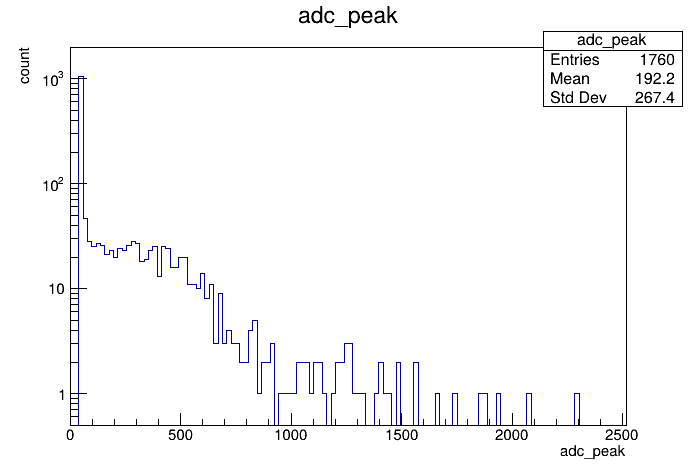

In [38]:
c1.Draw()

In [10]:
df.Max("adc_peak").GetValue()

1193.0

In [2]:
eospath='root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_100_ana.ntuple.root'

f = ROOT.TFile.Open(eospath)

In [4]:
f.ls()
f.Close()


TNetXNGFile**		root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_100_ana.ntuple.root	
 TNetXNGFile*		root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_100_ana.ntuple.root	
  KEY: TDirectoryFile	triggerAna;1	triggerAna (TriggerAnaTree) folder


In [ ]:
for k in range(138,139):
    eospath=f'root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_{k}_ana.ntuple.root'
    print(f"Processing file {k}: {eospath}")
    info_obj = None
    tree_names = []
    tp_tree_names = []

    try:
        with ROOT.TFile.Open(eospath) as infile:
            infile['triggerAna'].ls()
            info_obj = infile['triggerAna/info']
            tree_names  = [k.GetName() for k in infile['triggerAna'].GetListOfKeys() if k.GetClassName()=='TTree']
            tp_tree_names  = [f'TriggerPrimitives/{k.GetName()}' for k in infile['triggerAna/TriggerPrimitives'].GetListOfKeys() if k.GetClassName()=='TTree']
    except OSError:
        print(f"Failed to open file {k} - skipping")
        continue

    outname=f'data/bbb_{k}.root'

    with ROOT.TFile(outname, "recreate") as outfile:
        outfile.mkdir('triggerAna')
        outfile['triggerAna'].WriteObject(info_obj, 'info')


    rso = ROOT.RDF.RSnapshotOptions()
    rso.fMode = "UPDATE"

    for t in tree_names+tp_tree_names:
        rdf = ROOT.RDataFrame(f'triggerAna/{t}', eospath)
        rdf_up = rdf.Redefine('event', f'event+{k*10}')
        rdf_up.Snapshot(f'triggerAna/{t}', outname, options=rso)


Processing file 138: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_138_ana.ntuple.root

Processing file 139: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_139_ana.ntuple.root

Failed to open file 139 - skipping

Processing file 140: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_140_ana.ntuple.root

Processing file 141: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_141_ana.ntuple.root

Processing file 142: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_142_ana.ntuple.root

Processing file 143: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_143_ana.ntuple.root

Processing file 144: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_144_ana.ntuple.root

Processing file 145: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_145_ana.ntuple.root

Processing file 146: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_146_ana.ntuple.root

Processing file 147: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_147_ana.ntuple.root

Processing file 148: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_148_ana.ntuple.root

Processing file 149: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_149_ana.ntuple.root

Processing file 150: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_150_ana.ntuple.root

Processing file 151: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_151_ana.ntuple.root

Processing file 152: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_152_ana.ntuple.root

Processing file 153: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_153_ana.ntuple.root

Processing file 154: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_154_ana.ntuple.root

Processing file 155: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_155_ana.ntuple.root

Processing file 156: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_156_ana.ntuple.root

Processing file 157: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_157_ana.ntuple.root

Processing file 158: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_158_ana.ntuple.root

Processing file 159: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_159_ana.ntuple.root

Processing file 160: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_160_ana.ntuple.root

Processing file 161: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_161_ana.ntuple.root

Processing file 162: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_162_ana.ntuple.root

Processing file 163: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_163_ana.ntuple.root

Processing file 164: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_164_ana.ntuple.root

Processing file 165: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_165_ana.ntuple.root

Processing file 166: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_166_ana.ntuple.root

Processing file 167: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_167_ana.ntuple.root

Processing file 168: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_168_ana.ntuple.root

Processing file 169: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_169_ana.ntuple.root

Processing file 170: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_170_ana.ntuple.root

Processing file 171: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_171_ana.ntuple.root

Processing file 172: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_172_ana.ntuple.root

Processing file 173: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_173_ana.ntuple.root

Processing file 174: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_174_ana.ntuple.root

Processing file 175: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_175_ana.ntuple.root

Processing file 176: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_176_ana.ntuple.root

Processing file 177: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_177_ana.ntuple.root

Processing file 178: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_178_ana.ntuple.root

Processing file 179: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_179_ana.ntuple.root

Processing file 180: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_180_ana.ntuple.root

Processing file 181: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_181_ana.ntuple.root

Processing file 182: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_182_ana.ntuple.root

Processing file 183: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_183_ana.ntuple.root

Processing file 184: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_184_ana.ntuple.root

Processing file 185: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_185_ana.ntuple.root

Processing file 186: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_186_ana.ntuple.root

Processing file 187: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_187_ana.ntuple.root

Processing file 188: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_188_ana.ntuple.root

Processing file 189: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_189_ana.ntuple.root

Processing file 190: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_190_ana.ntuple.root

Processing file 191: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_191_ana.ntuple.root

Processing file 192: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_192_ana.ntuple.root

Processing file 193: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_193_ana.ntuple.root

Failed to open file 193 - skipping

Processing file 194: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_194_ana.ntuple.root

Processing file 195: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_195_ana.ntuple.root

Processing file 196: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_196_ana.ntuple.root

Processing file 197: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_197_ana.ntuple.root

Processing file 198: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_198_ana.ntuple.root

Processing file 199: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_199_ana.ntuple.root

Processing file 200: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_200_ana.ntuple.root

Processing file 201: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_201_ana.ntuple.root

Processing file 202: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_202_ana.ntuple.root

Processing file 203: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_203_ana.ntuple.root

Processing file 204: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_204_ana.ntuple.root

Processing file 205: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_205_ana.ntuple.root

Processing file 206: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_206_ana.ntuple.root

Processing file 207: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_207_ana.ntuple.root

Processing file 208: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_208_ana.ntuple.root

Processing file 209: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_209_ana.ntuple.root

Processing file 210: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_210_ana.ntuple.root

Processing file 211: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_211_ana.ntuple.root

Processing file 212: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_212_ana.ntuple.root

Processing file 213: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_213_ana.ntuple.root

Processing file 214: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_214_ana.ntuple.root

Processing file 215: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_215_ana.ntuple.root

Processing file 216: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_216_ana.ntuple.root

Processing file 217: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_217_ana.ntuple.root

Processing file 218: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_218_ana.ntuple.root

Processing file 219: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_219_ana.ntuple.root

Processing file 220: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_220_ana.ntuple.root

Processing file 221: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_221_ana.ntuple.root

Processing file 222: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_222_ana.ntuple.root

Processing file 223: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_223_ana.ntuple.root

Processing file 224: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_224_ana.ntuple.root

Processing file 225: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_225_ana.ntuple.root

Processing file 226: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_226_ana.ntuple.root

Processing file 227: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_227_ana.ntuple.root

Processing file 228: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_228_ana.ntuple.root

Processing file 229: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_229_ana.ntuple.root

Processing file 230: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_230_ana.ntuple.root

Processing file 231: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_231_ana.ntuple.root

Processing file 232: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_232_ana.ntuple.root

Processing file 233: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_233_ana.ntuple.root

Processing file 234: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_234_ana.ntuple.root

Processing file 235: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_235_ana.ntuple.root

Processing file 236: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_236_ana.ntuple.root

Processing file 237: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_237_ana.ntuple.root

Processing file 238: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_238_ana.ntuple.root

Processing file 239: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_239_ana.ntuple.root

Processing file 240: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_240_ana.ntuple.root

Processing file 241: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_241_ana.ntuple.root

Processing file 242: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_242_ana.ntuple.root

Processing file 243: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_243_ana.ntuple.root

Processing file 244: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_244_ana.ntuple.root

Processing file 245: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_245_ana.ntuple.root

Processing file 246: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_246_ana.ntuple.root

Processing file 247: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_247_ana.ntuple.root

Processing file 248: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_248_ana.ntuple.root

Processing file 249: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_249_ana.ntuple.root

Processing file 250: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_250_ana.ntuple.root

Processing file 251: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_251_ana.ntuple.root

Processing file 252: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_252_ana.ntuple.root

Processing file 253: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_253_ana.ntuple.root

Processing file 254: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_254_ana.ntuple.root

Processing file 255: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_255_ana.ntuple.root

Processing file 256: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_256_ana.ntuple.root

Processing file 257: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_257_ana.ntuple.root

Processing file 258: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_258_ana.ntuple.root

Processing file 259: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_259_ana.ntuple.root

Processing file 260: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_260_ana.ntuple.root

Processing file 261: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_261_ana.ntuple.root

Processing file 262: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_262_ana.ntuple.root

Processing file 263: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_263_ana.ntuple.root

Processing file 264: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_264_ana.ntuple.root

Processing file 265: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_265_ana.ntuple.root

Processing file 266: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_266_ana.ntuple.root

Processing file 267: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_267_ana.ntuple.root

Processing file 268: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_268_ana.ntuple.root

Processing file 269: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_269_ana.ntuple.root

Processing file 270: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_270_ana.ntuple.root

Processing file 271: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_271_ana.ntuple.root

Processing file 272: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_272_ana.ntuple.root

Processing file 273: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_273_ana.ntuple.root

Processing file 274: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_274_ana.ntuple.root

Processing file 275: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_275_ana.ntuple.root

Processing file 276: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_276_ana.ntuple.root

Processing file 277: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_277_ana.ntuple.root

Processing file 278: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_278_ana.ntuple.root

Processing file 279: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_279_ana.ntuple.root

Processing file 280: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_280_ana.ntuple.root

Processing file 281: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_281_ana.ntuple.root

Processing file 282: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_282_ana.ntuple.root

Processing file 283: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_283_ana.ntuple.root

Processing file 284: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_284_ana.ntuple.root

Processing file 285: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_285_ana.ntuple.root

Processing file 286: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_286_ana.ntuple.root

Processing file 287: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_287_ana.ntuple.root

Processing file 288: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_288_ana.ntuple.root

Processing file 289: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_289_ana.ntuple.root

Processing file 290: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_290_ana.ntuple.root

Processing file 291: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_291_ana.ntuple.root

Processing file 292: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_292_ana.ntuple.root

Processing file 293: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_293_ana.ntuple.root

Processing file 294: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_294_ana.ntuple.root

Processing file 295: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_295_ana.ntuple.root

Processing file 296: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_296_ana.ntuple.root

Processing file 297: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_297_ana.ntuple.root

Processing file 298: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_298_ana.ntuple.root

Processing file 299: 
root://eosproject.cern.ch//eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_ce
nter_2333289_299_ana.ntuple.root

TDirectoryFile*		triggerAna	triggerAna (TriggerAnaTree) folder
 KEY: TDirectoryFile	TriggerPrimitives;1	Trigger Primitive Trees
 KEY: TNamed	info;1	{"backtracker":{"TPAlgTPCSimpleThreshold":{"offset_U":8,"offset_V":1,"offset_X":-7}},"geo":{"detector":"dunevd10kt_3view_30deg_v5_refactored_1x8x6ref"},"tpg":{"tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker":{"threshold_tpg_plane0":45,"threshold_tpg_plane1":45,"threshold_tpg_plane2":45,"tool":"TPAlgTPCSimpleThreshold"}}}
 KEY: TTree	mctruths;1	mctruths
 KEY: TTree	mcneutrinos;1	mcneutrinos
 KEY: TTree	mcparticles;1	mcparticles
 KEY: TTree	simides;1	simides
 KEY: TTree	event_summary;1	event_summary
TDirectoryFile*		triggerAna	triggerAna (TriggerAnaTree) folder
 KEY: TDirectoryFile	TriggerPrimitives;1	Trigger Primitive Trees
 KEY: TNamed	info;1	{"backtracker":{"TPAlgTPCSimpleThreshold":{"offset_U":8,"offset_V":1,"offset_X":-7}},"geo":{"detector":"dunevd10kt_3view_30deg_v5_refactored_1x8x6ref"},"tpg":{"tpmakerTPCSimpleThreshold::TriggerPrimi

Info in <[ROOT.RDF] Info /tmp/tmpiiczot20/include/ROOT/RDF/RInterface.hxx:1363 in auto ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager, void>::Snapshot(std::string_view, std::string_view, const ColumnNames_t &, const RSnapshotOptions &)::(anonymous class)::operator()() const [Proxied = ROOT::Detail::RDF::RLoopManager, DataSource = void]>: 
	In ROOT 6.38, the default compression settings of Snapshot have been changed from 101 (ZLIB with compression level 1, the TTree default) to 505 (ZSTD with compression level 5). This change may result in smaller Snapshot output dataset size by default. In order to suppress this message, set 'ROOT_RDF_SNAPSHOT_INFO=0' in your environment or set 'ROOT.RDF.Snapshot.Info: 0' in your .rootrc file.
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3011] Unable to open file /eos/project/d/dunedaq-eos/vd-preproduction/vd_1x8x6_eminus_center/ana/vd_1x8x6_eminus_center_2333289_139_ana.ntuple.root; No such file or directory

Error in 

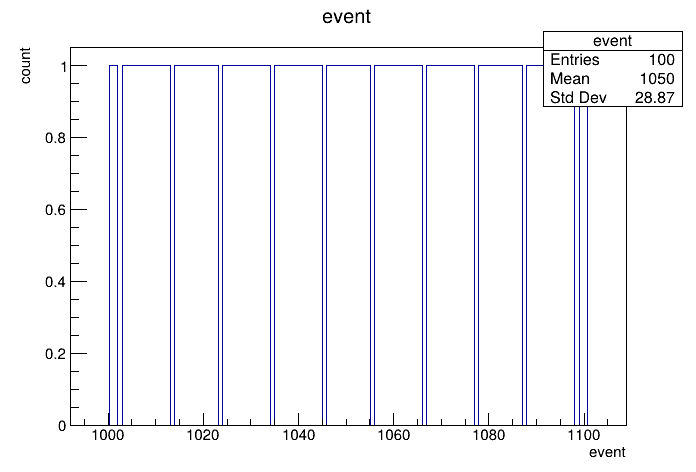

In [91]:
rdf = ROOT.RDataFrame(f'triggerAna/event_summary', [f'bbb_{k}.root' for k in range(100,110)])
c1 = ROOT.TCanvas()
rdf.Histo1D("event").DrawClone()
c1.Draw()


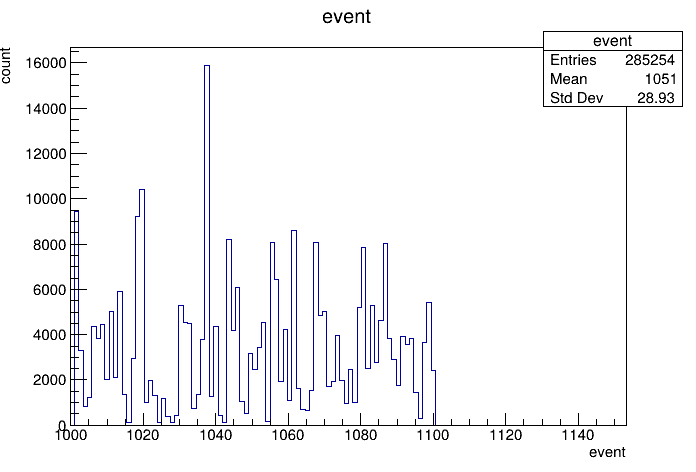

In [98]:
rdf = ROOT.RDataFrame(f'triggerAna/simides', [f'bbb_{k}.root' for k in range(100,110)])
c2 = ROOT.TCanvas()
rdf.Histo1D("event").DrawClone()
c2.Draw()


In [97]:
rdf = ROOT.RDataFrame(f'triggerAna/simides', [f'bbb_{k}.root' for k in range(100,110)])
# c2 = ROOT.TCanvas()
# rdf.Histo1D("event").DrawClone()
# c2.Draw()
rdf.Display()

Row,channel,detector_element,energy,event,numelectrons,origTrackID,readout_plane_id,readout_view,run,subrun,timestamp,trackID,x,y,z
0,17547,20.000000,0.000173,1001,4.867156,-999.000000,0.000000,0.000000,20000011,0,1259,1,223.997528,151.779007,447.795105
1,17547,20.000000,0.000389,1001,10.917923,-999.000000,0.000000,0.000000,20000011,0,1260,1,223.941223,151.753708,447.821472
2,17547,20.000000,0.000538,1001,15.250607,-999.000000,0.000000,0.000000,20000011,0,1261,1,223.839920,151.706573,447.870178
3,17547,20.000000,0.000925,1001,26.313374,-999.000000,0.000000,0.000000,20000011,0,1262,1,223.759445,151.666504,447.910797
4,17547,20.000000,0.001562,1001,44.374157,-999.000000,0.000000,0.000000,20000011,0,1263,1,223.689667,151.629837,447.947632
,,,,,,,,,,,,,,,


In [4]:
m = ROOT.TFileMerger()
for f in [f'data/bbb_{k}.root' for k in range(100,200)]:
    m.AddFile(f)
m.OutputFile("ccc.root")
m.Merge()

True

[TFile::Cp] Total 0.51 MB	|====================| 100.00 % [298.8 MB/s]
[TFile::Cp] Total 0.60 MB	|====================| 100.00 % [468.2 MB/s]
[TFile::Cp] Total 0.24 MB	|====================| 100.00 % [411.0 MB/s]
[TFile::Cp] Total 0.58 MB	|====================| 100.00 % [478.3 MB/s]
[TFile::Cp] Total 0.41 MB	|====================| 100.00 % [504.7 MB/s]
[TFile::Cp] Total 0.54 MB	|====================| 100.00 % [776.3 MB/s]
[TFile::Cp] Total 0.52 MB	|====================| 100.00 % [780.0 MB/s]
[TFile::Cp] Total 0.35 MB	|====================| 100.00 % [651.5 MB/s]
[TFile::Cp] Total 0.61 MB	|====================| 100.00 % [809.8 MB/s]
[TFile::Cp] Total 0.42 MB	|====================| 100.00 % [744.8 MB/s]
[TFile::Cp] Total 0.48 MB	|====================| 100.00 % [903.7 MB/s]
[TFile::Cp] Total 0.41 MB	|====================| 100.00 % [882.4 MB/s]
[TFile::Cp] Total 0.78 MB	|====================| 100.00 % [890.2 MB/s]
[TFile::Cp] Total 0.66 MB	|====================| 100.00 % [813.5 MB/s]
[TFile